### 1.logistic回归
逻辑回归中，预测值:

$$h = P(y=1|x)$$

其表示值为1的概率，取值范围在[0,1]之间
引入sigmoid函数，预测值:

$$h = Sigmoid(w^{T}x + b) = \sigma(w^{T}x + b)$$

其中
$$Sigmoid(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$$
注意：函数的一阶导数可以用其自身表示:
$$\frac{\partial \sigma(z)}{\partial z} = \sigma(z)(1-\sigma(z))$$

### 2.logistic回归 损失函数
#### Loss function
一般来说，使用平方错误来衡量loss function:
$$L(h^{hat},y) = \frac{1}{2}(y^{hat}-y)^{2}$$
但是，对于logistic 回归来说，一般不适合用平方错误来作为loss function,这是因为上面的平方错误损失函数一般是非凸函数，在使用梯度下降算法的时候，容易得到局部最优解，而不是全局最优解。因此要选择凸函数。

首先最大似然函数:
其中$h = P(y=1|x)$代表预测y==1的概率
$$LL(h,y) = h^{y}(1-h)^(1-y)$$

进行log后得到的对数似然损失函数如下:
$$ll(h,y) = log(LL(h,y)) = ylog(h) + (1-y)log(1-h)$$

最大似然函数最初是希望越大越好，求出估计参数，但是我们的损失函数是希望越小越好
因此最大似然损失函数可以定义为-1 * 最大对数似然函数
最大似然损失函数：

$$l(h,y) = -1 * ll(h,y) = -ylog(h) - (1-y)log(1-h)$$

目标是最小化样本点的损失loss function,损失函数是针对单个样本点的

#### cost function
全部训练数据集的loss_function总和的平均值即为训练集的代价函数（cost function）
$$J(w,b) = \frac{1}{m}\sum_{i=1}^{m}l(h^{(i)},y^{(i)}) = -\frac{1}{m}[y^{(i)}logh^{(i)} + (1-y^{(i)})log(1-y^{(i)})]$$

    1.cost function是带求系数w和b的函数
    2.目标是迭代计算出最佳的w和b的值，最小化cost function，让其尽可能的接近于0
    
### 3.梯度下降
用梯度下降法来最小化cost function,以计算出合适的w和b的值。
每次迭代更新的修正的表达式:
$$w := w - \alpha\frac{\partial J(w,b)}{\partial w}$$
$$b := b - \alpha\frac{\partial J(w,b)}{\partial b}$$

在程序代码中，通常使用dw表示$\frac{\partial J(w,b)}{\partial w}$,db表示$\frac{\partial J(w,b)}{\partial b}$

### 4.逻辑回归中的梯度下降法
对单个样本而言，逻辑回归loss function表达式为:
$$z = w^{T}x + b$$
$$h = \sigma(z)$$
$$l(h,y) = -ylog(h) - (1-y)log(1-h)$$

反向传播过程
$$dh = \frac{\partial l}{\partial h} = -\frac{y}{h} + \frac{(1-y)}{(1-h)}$$
$$dz=\frac{\partial l}{\partial z}=\frac{\partial l)}{\partial h} * \frac{\partial h}{\partial z} = (-\frac{y}{h} + \frac{(1-y)}{(1-h)}) * h(1-h) = h-y$$
$$dw_{1} = \frac{\partial l}{\partial w_{1}} = \frac{\partial l}{\partial z} * \frac{\partial z}{\partial w_{1}} = x_{1}*(a-y)$$
$$db = \frac{\partial l}{\partial b} = \frac{\partial l}{\partial z} * \frac{\partial z}{\partial b} = a-y$$

梯度下降法:
$$w_{1} := w_{1} - \alpha dw_{1}$$
$$w_{2} := w_{2} - \alpha dw_{2}$$
$$b := b - \alpha db$$

### 5.m个样本的梯度下降
对m个样本来说，其cost function表达式如下:
$$z^{i} = w^{T}x^{(i)} + b$$
$$h^{(i)} = \sigma(z^{i})$$
$$J(w,b) = \frac{1}{m}\sum_{i=1}^{m}l(h^{(i)},y^{(i)}) = -\frac{1}{m}[y^{(i)}logh^{(i)} + (1-y^{(i)})log(1-y^{(i)})]$$
cost function 关于w和b的偏导数可以写成所有样本点偏导数和的平均形式:
$$dw_{1} = \frac{1}{m}\sum_{i=1}^{m}x_{1}^{(i)}(h^{(i)} - y^{(i)})$$
$$dw_{2} = \frac{1}{m}\sum_{i=1}^{m}x_{2}^{(i)}(h^{(i)} - y^{(i)})$$
$$db = \frac{1}{m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})$$

完整的logistic 回归中某次训练的流程如下，这里假设特征向量的维度为2


$J = 0,dw_{1} = 0,dw_{2} = 0,db = 0$

for i = 1 to m:

&emsp;&emsp;$z^{(i)} = w^{T}x^{(i)} + b$

&emsp;&emsp;$h^{(i)} = \sigma(z^{(i)})$

&emsp;&emsp;$J += -[y^{(i)}logh^{(i)} + (1-y^{(i)})log(1-y^{(i)})]$

&emsp;&emsp;$dz^{(i)} = h^{(i)}(1-h^{(i)})$

&emsp;&emsp;$dw_{1} += x_{1}^{(i)}dz^{(i)}$

&emsp;&emsp;$dw_{2} += x_{2}^{(i)}dz^{(i)}$

&emsp;&emsp;$db += dz^{(i)}$

$J = J/m,dw_{1} = dw_{1}/m,dw_{2} = dw_{2}/m,db = db/m$

然后对$w_{1},w_{2},b$进行迭代。

上诉过程在计算的时候有一个缺点：需要编写两个for循环。第一个for循环遍历m个样本，第二个for循环遍历所有特征。如果有大量特征，在代码中显示使用for循环会使算法很低效，向量化可以用于解决显示使用for循环的问题。

### 6.向量化（Vectorization）
在logistic 回归中，需要计算：
$$z = w^{T}x + b$$
如果是非向量化的循环方式操作，代码可能如下:
```
z = 0
for i in range(n_x):
    z += w[i] * x[i]
z += b
```
#### 剖析如何去掉for循环

$$dw_{1} = \frac{1}{m}\sum_{i=1}^{m}x_{1}^{(i)}(h^{(i)} - y^{(i)})$$
$$dw_{2} = \frac{1}{m}\sum_{i=1}^{m}x_{2}^{(i)}(h^{(i)} - y^{(i)})$$
$$db = \frac{1}{m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})$$

其中$dw$是求导矩阵，可以将$dw_{1},dw_{2}$按照行进行拼接

$$dw = 
 \left[
 \begin{matrix}
   dw_{1} \\
   dw_{2} \\
  \end{matrix}
  \right]
  = \frac{1}{m}
  \left[
  \begin{matrix}
   \sum_{i=1}^{m}x_{1}^{(i)}(h^{(i)} - y^{(i)}) \\
   \sum_{i=1}^{m}x_{2}^{(i)}(h^{(i)} - y^{(i)}) \\
  \end{matrix}
  \right]
$$

重新定义向量

1. 输入矩阵X: ($n_{x}$,m)
2. 权重矩阵W: ($n_{x}$,1)
3. 偏置b: 为一个常数
4. 输出矩阵Y: (1,m)

假设特征向量个数为2，然后有m个样本:
输入矩阵X格式如下:
$$X = 
 \left[
 \begin{matrix}
   x_1^{1} & \cdots x_1^{m} \\
   x_2^{1} & \cdots x_2^{m} \\
  \end{matrix}
  \right]
$$
权重矩阵w格式如下:
$$
W = 
 \left[
 \begin{matrix}
   w_1 \\
   w_2 \\
  \end{matrix}
  \right]
$$
那么累加和矩阵Z 格式如下:
$$
Z = 
 \left[
 \begin{matrix}
   z_1 & \cdots z_m \\
  \end{matrix}
  \right]
  =
  \left[
  \begin{matrix}
   W^{T} * X^{(1)} + b & \cdots W^{T} * X^{(m)} + b \\
  \end{matrix}
  \right]
  = W^{T} * X + b
$$


如果是向量化操作，代码会简洁很多，并带来近百倍的性能提升(并行指令)
```
z = np.dot(w.T,x) + b
h = sigmoid(z)
```

#### 逻辑回归梯度下降输出向量化
不用显示for循环，实现logistic回归的梯度下降一次迭代(即计算m个样本的平均损失):
$$Z = w^{T}X + b = np.dot(w.T,x) + b$$
$$H = \sigma(Z)$$
$$dZ = A - Y$$
$$dw = \frac{1}{m}XdZ^{T}$$
$$db = \frac{1}{m}np.sum(dZ)$$
$$w := w - \alpha dw$$
$$b := b - \alpha db$$

多次迭代的梯度下降依然需要for循环

### 7.手动推导过程

![hands](./picture/hands_logistic.jpg)


### 8.代码


In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data,columns = iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [254]:
y_train

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1.])

In [170]:
class LogisticRegressionClassifier:
    def __init__(self,max_iter=2,learning_rate=0.005):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        #self.X_norm,self.ranges,self.min_vals = self.auto_norm(self.X_train)
        
    # 归一化，自己写    
    def auto_norm(self,data_set):
        min_vals = data_set.min(0)
        max_vals = data_set.max(0)
        ranges = max_vals - min_vals
        m,n = data_set.shape
        norm_data = data_set - np.tile(min_vals,(m,1))
        norm_data = norm_data/np.tile(ranges,(m,1))
        return norm_data,ranges,min_vals
    
    def correct_data(self,data_set):
        '''
        在归一化测试数据集的时候，可能出现异常情况
        '''
        
    def sigmoid(self,x):
        s = 1./(1 + np.exp(-x))
        return s
    
    def fit(self,X,y):
        '''
        注意此时X.shape=(m,n) Y = (m,1)
        '''
        m,n = X.shape
        X = X.reshape((n,m))
        print('X.shape ' + str(X.shape))
        Y = y.reshape((1,m))
        self.weights = np.array([0.0] * n).reshape((n,1))
        #print('weights.shape ' + str(self.weights.shape))
        
        self.bias = 0.0
        for iter in range(self.max_iter):
            Z = np.dot(self.weights.T,X) + self.bias
            #print('Z.shape ' + str(Z.shape))
            H = self.sigmoid(Z)
            dz = H - Y
            #print('dz.shape ' + str(dz.shape))
            dw = (1./m) * np.dot(X,dz.T)
            #print('dz ' + str(dz))
            db = (1./m) * np.sum(dz,axis=1)
            #print('db ' + str(db))
            #print('dw.shape ' + str(dw.shape))
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))
    def score(self,X_test,y_test):
        '''
        输入矩阵X_test.shape [m,n_x]
        输入labels Array[y1,y2]
        '''
        m,n = X_test.shape
        X_test = X_test.reshape((n,m))
        X_pred = np.dot(self.weights.T,X_test) + self.bias
        X_pred = X_pred.reshape((m,))
        right_count = 0
        for i in range(m):
            if (y_test[i] == 1 and X_pred[i] >= 0) or (y_test[i] == 0 and X_pred[i] < 0):
                right_count += 1
        return right_count/m
        

In [171]:
lr_clf = LogisticRegressionClassifier()
lr_clf.fit(X_train,y_train)

X.shape (2, 70)
LogisticRegression Model(learning_rate=0.005,max_iter=2)


In [172]:
lr_clf.score(X_test, y_test)

0.43333333333333335

In [96]:
lr_clf.weights[1,0]

0.01932845258568052

In [120]:
lr_clf.bias

array([-0.05036773])

In [113]:
y_train.shape

(70,)

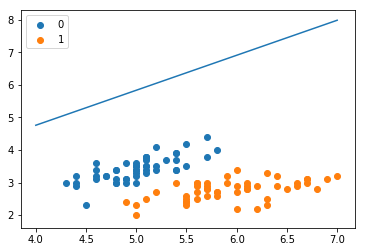

In [125]:
x_points = np.arange(4, 8)
y_ = -(lr_clf.weights[0,0] * x_points + lr_clf.bias)/lr_clf.weights[1,0]
plt.plot(x_points,y_)

plt.scatter(X_train[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [249]:
## 感觉上面的代码没问题，但是正确率太低了，感觉哪里不对劲，重新写一个类
class LRClassifier:
    def __init__(self,max_iter=500,learning_rate=0.5,print_cost=True):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.print_cost = print_cost
        
    def sigmoid(self,z):
        s = 1./(1 + np.exp(-z))
        return s
    
    def initialize_with_zeros(self,dim):
        w = np.ones(shape=(dim,1),dtype=np.float32)
        b = 1.0
        assert(w.shape == (dim,1))
        assert(isinstance(b,float))
        return w,b
    
    def propagate(self,w,b,X,Y):
        m = X.shape[1]
        H = self.sigmoid(np.dot(w.T,X) + b)
        assert(H.shape == (1,m))

        cost = (-1.0/m) * np.sum((Y * np.log(H)) + (1-Y) * np.log(1-H),axis=1)
        dw = (1.0/m) * np.dot(X,(H-Y).T)
        db = (1.0/m) * np.sum(H-Y)
        #print('db ' + str(db))
        #print('(H-Y).T.shape ' + str((H-Y).T.shape))
        #print('dw.shape ' + str(dw.shape))
        #print('w.shape' + str(w.shape))
        assert(dw.shape == w.shape)
        assert(isinstance(db,float))
        cost = np.squeeze(cost)
        assert(cost.shape == ())
        
        grads = {'dw':dw,'db':db}
        return grads,cost
    
    def optimize(self,w,b,X,Y):
        costs = []
        for i in range(self.max_iter):
            grads,cost = self.propagate(w,b,X,Y)
            dw = grads['dw']
            db = grads['db']
            
            w = w - self.learning_rate * dw
            b = b - self.learning_rate * db
            
            if i % 100 == 0:
                costs.append(cost)
            if self.print_cost and i % 100 == 0:
                print('Cost after iteration %d: %f '%(i,cost))
        params = {'w':w,'b':b}
        grads = {'dw':dw,'db':db}
        
        return params,grads,costs
    
    def predict(self,w,b,X):
        m = X.shape[1]
        Y_prediction = np.zeros((1,m))
        w = w.reshape((X.shape[0],1))
        
        H = self.sigmoid(np.dot(w.T,X) + b)
        for i in range(H.shape[1]):
            if H[0,i] >= 0.5:
                Y_prediction[0,i] = 1
            else:
                Y_prediction[0,i] = 0
        assert(Y_prediction.shape == (1,m))
        
        return Y_prediction
    
    def fit(self,X,y):
        '''
        矩阵格式需要转换，一开始是X :[m,n] 需要转换为[n,m]
        '''
        m,n = X.shape
        X = X.reshape((n,m))
        y = y.reshape((1,m))
        #print('X.shape ' + str(X.shape))
        #print('y.shape ' + str(y.shape))
        
        self.w,self.b = self.initialize_with_zeros(n)
        params,grads,costs = self.optimize(self.w,self.b,X,y)
        self.w = params['w']
        self.b = params['b']
        
        y_prediction = self.predict(self.w,self.b,X)
        print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction - y)) * 100))
        d = {'costs':costs,
             'y_prediction':y_prediction,
             'w':self.w,
             'b':self.b,
             'learning_rate':self.learning_rate,
             'max_iter':self.max_iter
            }
        return d
    
    def score(self,X_test,y_test):
        m,n = X_test.shape
        X_test = X_test.reshape((n,m))
        y_test = y_test.reshape((1,m))
        y_prediction = self.predict(self.w,self.b,X_test)
        print('y_prediction ' + str(y_prediction))
        print('y_test ' + str(y_test))
        return (1 - np.mean(np.abs(y_prediction - y_test)))

In [250]:
lr_clf = LRClassifier()
d = lr_clf.fit(X_train,y_train)

Cost after iteration 0: 5.007622 
Cost after iteration 100: 1.544078 
Cost after iteration 200: 1.589089 
Cost after iteration 300: 1.628537 
Cost after iteration 400: 1.656166 
train accuracy: 47.14285714285714 %


In [251]:
res = lr_clf.score(X_train,y_train) 

y_prediction [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y_test [[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
  0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]]


In [252]:
res

0.4714285714285714

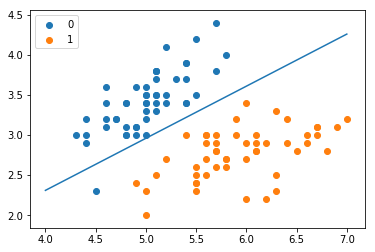

In [246]:
x_points = np.arange(4, 8)
y_ = -(lr_clf.w[0,0] * x_points + lr_clf.b)/lr_clf.w[1,0]
plt.plot(x_points,y_)

plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [256]:
'''
我分析准确率差这么多的原因
1.首先参考代码是采用随机梯度下降法，每次更新一个实例
2.发现一个简单问题，最后更新的时候损失不在下降
'''
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [215]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [216]:
lr_clf.score(X_test, y_test)

1.0

In [217]:
lr_clf.score(X_train, y_train)

0.9857142857142858

In [218]:
len(X_train)

70